In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
df = pd.read_csv('prelim_datasets/gameandgrade.csv')

# Cleaning the data of any null values it can find
df_cleaned = df.dropna()

print(df_cleaned.head())

   Sex  School Code  Playing Years  Playing Often  Playing Hours  \
0    0            1              1              2              1   
1    1            1              1              3              1   
2    0            1              0              0              0   
3    0            1              3              5              1   
4    1            1              1              1              2   

   Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
0              1               4                 4                 5  77.50  
1              1               1                 3                 3  83.00  
2              0               1                 3                 3  80.00  
3              1               2                 2                 3  45.00  
4              1               1                 3                 4  85.00  


In [126]:

print(df_cleaned['Grade'].dtype)

# Cleaning Grade column because of weird '98..0' values

df_cleaned['Grade'] = pd.to_numeric(df_cleaned['Grade'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['Grade'])

print(df_cleaned['Grade'].dtype)

object
float64


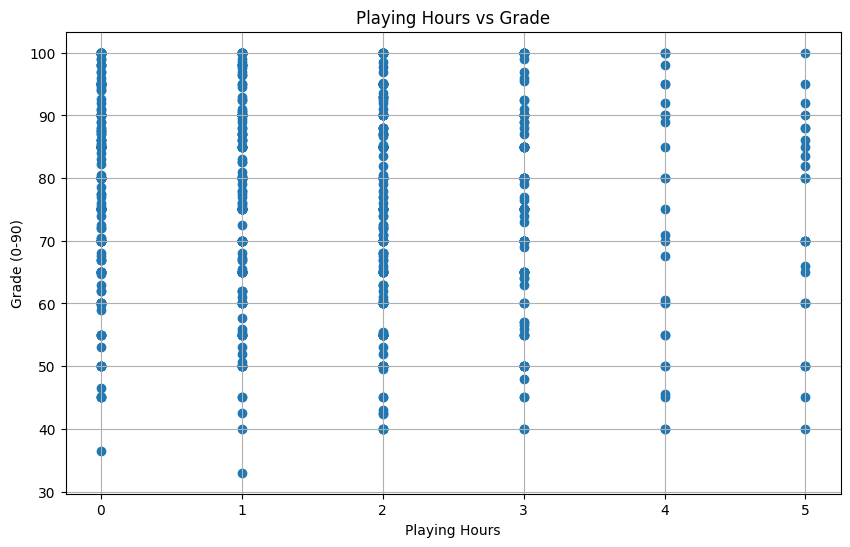

In [127]:
# I want to determine whether Playing Hours and Grade have any correlation

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Playing Hours'], df_cleaned['Grade'])
plt.title('Playing Hours vs Grade')
plt.xlabel('Playing Hours')
plt.ylabel('Grade (0-90)')
plt.grid(True)
plt.show()

In [128]:
X = df_cleaned['Playing Hours']
y = df_cleaned['Grade']

X = X.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [129]:
model = LinearRegression()

model.fit(X_train, y_train)

intercept = model.intercept_
coef = model.coef_[0]

print(f"Model trained with coefficients:")
print(f"Intercept: {intercept:.4f}")
print(f"Coefficient: {coef:.4f}")

Model trained with coefficients:
Intercept: 81.2437
Coefficient: -1.7778


In [130]:
# Trying out the model
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'Playing Hours': X_test[:10, 0],
    'Actual Grade': y_test.iloc[:10].values,
    'Predicted Grade': y_pred[:10]
})

print(comparison)

   Playing Hours  Actual Grade  Predicted Grade
0              3          90.0        75.910270
1              2          60.0        77.688075
2              0         100.0        81.243687
3              0          90.0        81.243687
4              1         100.0        79.465881
5              2          74.0        77.688075
6              3          65.0        75.910270
7              4          80.0        74.132464
8              0          60.0        81.243687
9              2          55.0        77.688075


In [131]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 271.7429
Root Mean Squared Error: 16.4846
R-squared: 0.0180


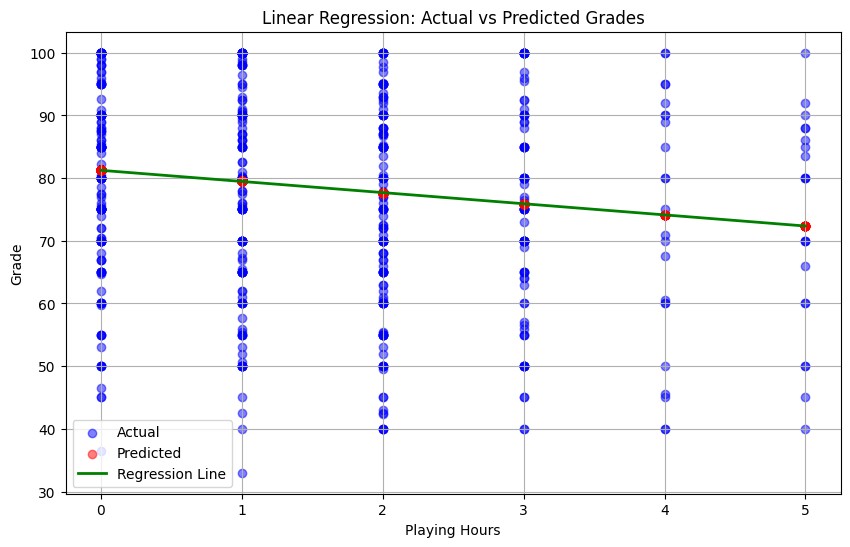

In [132]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='green', linewidth=2, label='Regression Line')

plt.xlabel('Playing Hours')
plt.ylabel('Grade')
plt.title('Linear Regression: Actual vs Predicted Grades')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
# This is me trying to find out which combination of variables works better with 'Grade'
correlation_with_grade = df_cleaned.corr()['Grade'].sort_values(ascending=False)
print("Correlation with Grade:")
print(correlation_with_grade)

Correlation with Grade:
Grade               1.000000
Mother Education    0.352449
Father Education    0.320154
School Code         0.250472
Playing Often      -0.007368
Parent Revenue     -0.054622
Playing Years      -0.106335
Sex                -0.133920
Playing Hours      -0.157634
Playing Games      -0.160670
Name: Grade, dtype: float64


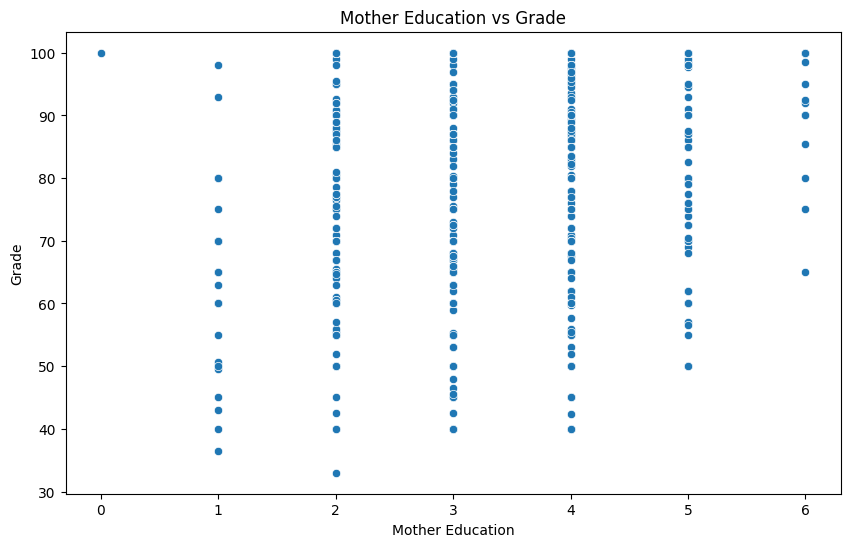

In [134]:
# Mother Education is the best variable with correlation to Grade
best_predictor = correlation_with_grade.index[1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_predictor, y=df_cleaned['Grade'], data=df)
plt.title(f'{best_predictor} vs Grade')
plt.show()

# However, it still shows huge variance - I realize that maybe because I'm comparing numerical data (grades) with categorical data (0-6 values)

In conclusion, comparing the column of Grade with any other variables leads you to innacurate predictions due to needing more than one variable to accurately predict grade as it may not just be one variable of either Playing Hours, Mother Education, and others but a combination of them.

Thus concluding that a multi-linear regression model is a better predictor than a single-linear regression model in this scenario.